In [76]:
#Imports
import pandas as pd
from spellchecker import SpellChecker
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
import numpy as np

In [77]:
#Read in data
data = pd.read_csv("data\mturk_experiment_2.csv",encoding = 'unicode_escape')

In [78]:
#Get spellcheck count
spell = SpellChecker()
tokeniser = TweetTokenizer()
mispelled_totals = []
mispelled_percent = []

for sentence in data["Sentence"]:
    tokenised = tokeniser.tokenize(sentence)
    misspelled = spell.unknown(tokenised)
    mispelled_totals.append(len(misspelled))

data["Spelling Errors"] = mispelled_totals    


In [79]:
#Get spellcheck percentage
data["Spelling Error Percentage"] = (data["Spelling Errors"] / data["Length in Words"]) * 100

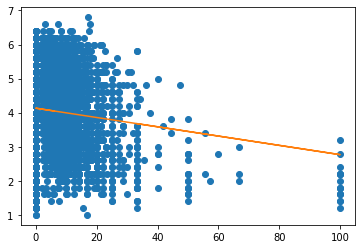

In [80]:
#Make plot
y = data["Formality"]
x = data["Spelling Error Percentage"]
x_ticks = np.arange(0,7.1,0.1)
y_ticks = np.arange(0,100.1,5)

m,b = np.polyfit(x,y,1)
plt.plot(x,y,'o')
plt.plot(x,m*x + b)


In [81]:
#0-0.3 indicates a negligble correlation 
correlation = data["Formality"].corr(data["Spelling Error Percentage"])
correlation

-0.1029006475722433